In [1]:
import os
import pandas as pd
from collections import defaultdict
import matplotlib.pyplot as plt 
import matplotlib


In [2]:
result_dir = 'records_old/records_time'
data = {}

for file in os.listdir(result_dir):
    df = pd.read_csv(os.path.join(result_dir, file, 'result.csv'), engine='python')    
    df = df.iloc[1:].fillna(0)
    data[int(file.split('-')[13])] = df

## Plot

In [3]:
epochs = sorted(list(data.keys()))

select_feat = 'ndcg@10'
# select_feat = 'total_seconds'
models = list(df['model'])
epoch2feat = []
for e in epochs:
    print(e)
    s = data[e][select_feat]
    s.name = e
    epoch2feat.append(data[e][select_feat])

10
25
50
100
250
500
1000
2000
3000
4000
5000
10000


In [4]:
epoch2feat = pd.concat(epoch2feat, axis=1).transpose()
epoch2feat.columns = models
epoch2feat

,sk-linear-regression,sk-lasso,sk-omp,BPDN,our-lasso
10,0.67552,0.182322,0.583751,0.298029,0.647963
25,0.67552,0.364672,0.583751,0.513195,0.800142
50,0.67552,0.555778,0.583751,0.626888,0.875398
100,0.67552,0.752794,0.583751,0.653934,0.917553
250,0.67552,0.897497,0.583751,0.697039,0.940298
500,0.67552,0.928974,0.583751,0.830377,0.950653
1000,0.67552,0.934533,0.583751,0.875216,0.958346
2000,0.67552,0.930691,0.583751,0.893540,0.960548
3000,0.67552,0.929737,0.583751,0.896000,0.959641
4000,0.67552,0.930437,0.583751,0.897091,0.960011


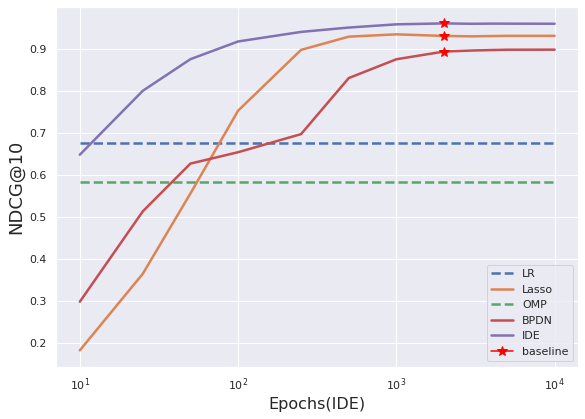

In [5]:
import seaborn as sns
sns.set_style(style="whitegrid")
sns.set(rc={'figure.figsize':(11.7*0.8,8.27*0.8)})

sns.lineplot(data=epoch2feat['sk-linear-regression'], linewidth=2.5, color=sns.color_palette()[0], linestyle='--', label='LR')
sns.lineplot(data=epoch2feat['sk-lasso'], linewidth=2.5, color=sns.color_palette()[1], label='Lasso')
sns.lineplot(data=epoch2feat['sk-omp'], linewidth=2.5, color=sns.color_palette()[2], linestyle='--', label='OMP')
sns.lineplot(data=epoch2feat['BPDN'], linewidth=2.5, color=sns.color_palette()[3], label='BPDN')
sns.lineplot(data=epoch2feat['our-lasso'], linewidth=2.5, color=sns.color_palette()[4], label='IDE')

plt.plot([2000], [epoch2feat['sk-lasso'].loc[2000]], marker='*', color='red', markersize=10, label='baseline')
plt.plot([2000], [epoch2feat['BPDN'].loc[2000]], marker='*', color='red', markersize=10)
plt.plot([2000], [epoch2feat['our-lasso'].loc[2000]], marker='*', color='red', markersize=10)

plt.xlabel('Epochs(IDE)', fontsize=16)
plt.ylabel('NDCG@10', fontsize=18)
plt.xscale('log')
plt.legend(loc='lower right')
plt.savefig('epoch-NDCG.pdf',bbox_inches='tight',pad_inches=0.0)#,dpi=fig.dpi

In [6]:
epochs = sorted(list(data.keys()))

select_feat = 'F1@10'
# select_feat = 'total_seconds'
models = list(df['model'])
epoch2feat = []
for e in epochs:
    print(e)
    s = data[e][select_feat]
    s.name = e
    epoch2feat.append(data[e][select_feat])

10
25
50
100
250
500
1000
2000
3000
4000
5000
10000


In [7]:
epoch2feat = pd.concat(epoch2feat, axis=1).transpose()
epoch2feat.columns = models
epoch2feat

,sk-linear-regression,sk-lasso,sk-omp,BPDN,our-lasso
10,0.411894,0.117717,0.365398,0.162063,0.390004
25,0.411894,0.234771,0.365398,0.286646,0.537286
50,0.411894,0.359544,0.365398,0.371379,0.637200
100,0.411894,0.519830,0.365398,0.400830,0.702487
250,0.411894,0.709054,0.365398,0.449020,0.760530
500,0.411894,0.764386,0.365398,0.600000,0.790553
1000,0.411894,0.773441,0.365398,0.661771,0.817701
2000,0.411894,0.768410,0.365398,0.693159,0.834006
3000,0.411894,0.767002,0.365398,0.699195,0.832619
4000,0.411894,0.768209,0.365398,0.701006,0.833006


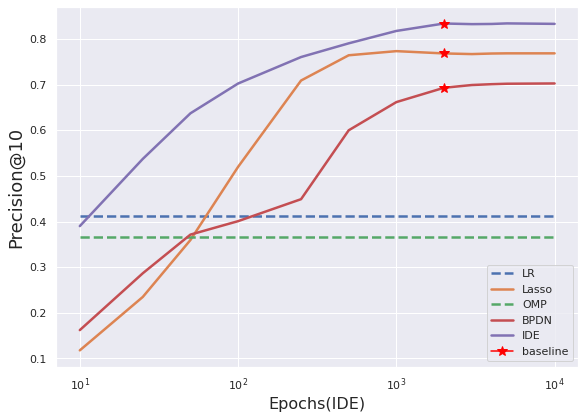

In [8]:
import seaborn as sns
sns.set_style(style="whitegrid")
sns.set(rc={'figure.figsize':(11.7*0.8,8.27*0.8)})

sns.lineplot(data=epoch2feat['sk-linear-regression'], linewidth=2.5, color=sns.color_palette()[0], linestyle='--', label='LR')
sns.lineplot(data=epoch2feat['sk-lasso'], linewidth=2.5, color=sns.color_palette()[1], label='Lasso')
sns.lineplot(data=epoch2feat['sk-omp'], linewidth=2.5, color=sns.color_palette()[2], linestyle='--', label='OMP')
sns.lineplot(data=epoch2feat['BPDN'], linewidth=2.5, color=sns.color_palette()[3], label='BPDN')
sns.lineplot(data=epoch2feat['our-lasso'], linewidth=2.5, color=sns.color_palette()[4], label='IDE')

plt.plot([2000], [epoch2feat['sk-lasso'].loc[2000]], marker='*', color='red', markersize=10, label='baseline')
plt.plot([2000], [epoch2feat['BPDN'].loc[2000]], marker='*', color='red', markersize=10)
plt.plot([2000], [epoch2feat['our-lasso'].loc[2000]], marker='*', color='red', markersize=10)

plt.xlabel('Epochs(IDE)', fontsize=16)
plt.ylabel('Precision@10', fontsize=18)
plt.xscale('log')
plt.legend(loc='lower right')
plt.savefig('epoch-F1.pdf',bbox_inches='tight',pad_inches=0.0)#,dpi=fig.dpi